In [1]:
import pandas as pd
import numpy as np
import streamlit as st

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('clean-data-LIMPO.csv')
df['comment'] = [s.lower() for s in df.comment]
df.drop(['Unnamed: 0'], axis=1, inplace=True)
pd.set_option('display.max_colwidth', None)
df = df.sample(frac=1).reset_index(drop=True)


In [3]:
df["labels"] = df["class"].map({0: "No hate", 
                                    1: "Hate"})

In [4]:
x = df["comment"]
y = df["labels"]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=100)

#### Training and modelling

In [5]:
model = Pipeline([('bow',CountVectorizer()), 
                    ('tfidf',TfidfTransformer()), 
                   # ('tfidfv',TfidfVectorizer()))
                    #('scaler', StandardScaler(with_mean=False)),
                    ('pac',PassiveAggressiveClassifier(C=1, validation_fraction=0.2, shuffle=True, n_jobs=-1))])


In [6]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9993604213694507

In [7]:
# Making prediction on test set
y_pred = model.predict(X_test)
  
# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred) * 100} %\n\n")  
target = ['no hate', 'hate']
print(f"Classification Report : \n\n{classification_report(y_test, y_pred,target_names=target)}")

Test Set Accuracy : 88.71331828442437 %


Classification Report : 

              precision    recall  f1-score   support

     no hate       0.90      0.86      0.88      3241
        hate       0.88      0.91      0.89      3404

    accuracy                           0.89      6645
   macro avg       0.89      0.89      0.89      6645
weighted avg       0.89      0.89      0.89      6645



#### Confusion matrix

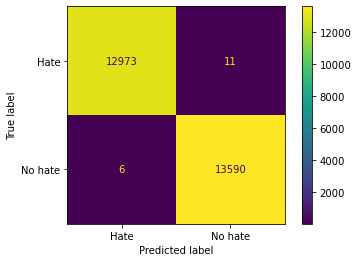

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

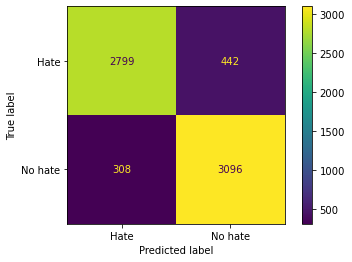

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### Predicting



In [10]:
cv = CountVectorizer()

In [11]:
def hate_speech_detection():
    st.title("Hate Speech Detection")
    user = st.text_area("Enter any Tweet: ")
    if len(user) < 1:
        st.write("  ")
    else:
        sample = user
        data = cv.transform([sample]).toarray()
        a = model.predict([data])
        st.title(a)
hate_speech_detection()

2022-09-13 19:31:02.762 
  command:

    streamlit run /usr/lib/python3/dist-packages/ipykernel_launcher.py [ARGUMENTS]
